In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading dataset

In [4]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

## Checking for missing data

In [7]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

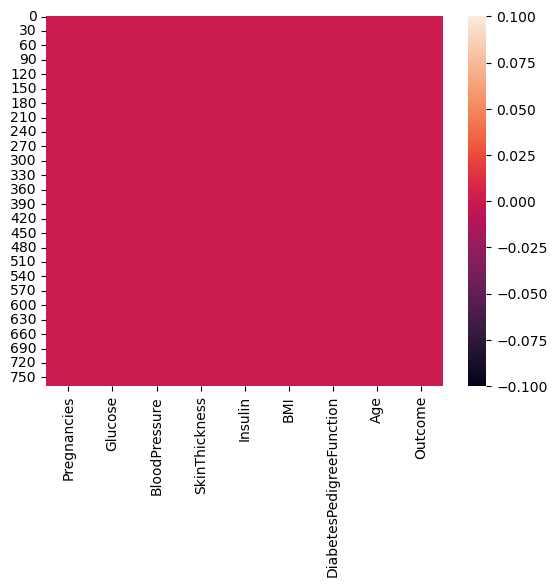

In [9]:
sns.heatmap(data.isnull())

## Co-relation Matrix

In [10]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

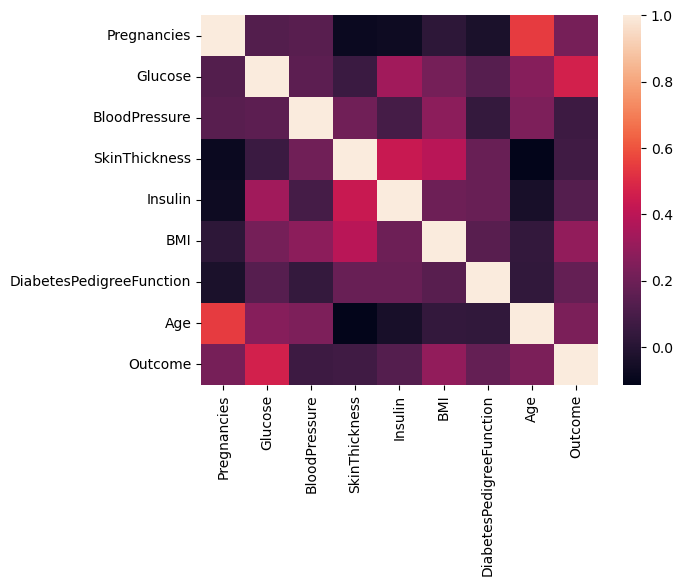

In [11]:
sns.heatmap(correlation)

## Train_test_split

In [12]:
X = data.drop("Outcome",axis=1)
Y= data['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
619,0,119,0,0,0,32.4,0.141,24
17,7,107,74,0,0,29.6,0.254,31
434,1,90,68,8,0,24.5,1.138,36
90,1,80,55,0,0,19.1,0.258,21
362,5,103,108,37,0,39.2,0.305,65
...,...,...,...,...,...,...,...,...
87,2,100,68,25,71,38.5,0.324,26
684,5,136,82,0,0,0.0,0.640,69
38,2,90,68,42,0,38.2,0.503,27
338,9,152,78,34,171,34.2,0.893,33


## Training the model

In [14]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

## Making Prediction

In [15]:
predictions = model.predict(X_test)
print(predictions)

[0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1]


## Evaluation

In [16]:
accuracy = accuracy_score(predictions, Y_test)
print (accuracy)

0.8376623376623377


## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
cm = confusion_matrix(Y_test, predictions)

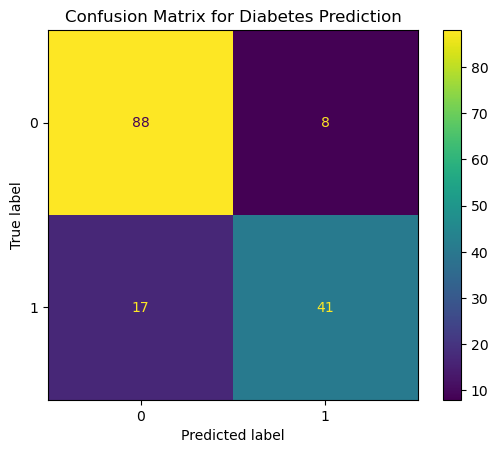

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix for Diabetes Prediction")
plt.show()

In [28]:
cm_df = pd.DataFrame(cm,index=["Actual No Diabetes", "Actual Diabetes"],columns=["Predicted No Diabetes", "Predicted Diabetes"])
cm_df

,Predicted No Diabetes,Predicted Diabetes
Actual No Diabetes,88,8
Actual Diabetes,17,41


## Model Performance Metrics

The overall precision, recall, and F1-score represent the aggregated performance of the diabetes prediction model on the test dataset.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [23]:
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8376623376623377
Precision: 0.8367346938775511
Recall: 0.7068965517241379
F1 Score: 0.7663551401869159


In [24]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        96
           1       0.84      0.71      0.77        58

    accuracy                           0.84       154
   macro avg       0.84      0.81      0.82       154
weighted avg       0.84      0.84      0.83       154

